<a href="https://colab.research.google.com/github/Bonnnana/Introduction-to-Data-Science/blob/main/Lab/Lab3(03_12_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [3]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor



In [ ]:
# Add as many imports as you need.

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for the Amazon stock. To accomplish this, you will use data from the preceding 7 days, and past statistics.


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- open - the open price of the stock
- high - the high price of the stock
- low - the low price of the stock
- volume - the volume trades
- close - the close price of the stock

Target:
close

Load the dataset into a `pandas` data frame.

In [4]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("/content/amazon_stock_price.csv")

In [5]:
df

,date,open,high,low,close,volume
0,1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1,1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
2,1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
3,1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
4,1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000
...,...,...,...,...,...,...
6680,2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000
6681,2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600
6682,2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200
6683,2023-12-05,143.5500,148.5700,143.1300,146.8800,46822400


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685 entries, 0 to 6684
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6685 non-null   object 
 1   open    6685 non-null   float64
 2   high    6685 non-null   float64
 3   low     6685 non-null   float64
 4   close   6685 non-null   float64
 5   volume  6685 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 313.5+ KB


In [7]:
df.describe()

,open,high,low,close,volume
count,6685.000000,6685.000000,6685.000000,6685.000000,6.685000e+03
mean,34.046304,34.456169,33.601226,34.036846,1.403635e+08
std,49.872534,50.458248,49.228487,49.844164,1.390697e+08
min,0.070300,0.072400,0.065600,0.069800,9.744000e+06
25%,2.037000,2.075000,1.995000,2.042500,6.716800e+07
50%,7.129500,7.183500,6.989500,7.108500,1.039520e+08
75%,45.352000,45.480500,44.875000,45.189000,1.587760e+08
max,187.200000,188.654000,184.839500,186.570500,2.086584e+09


In [8]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0


Explore the dataset using visualizations of your choice.

In [9]:
# Write your code here. Add as many boxes as you need.

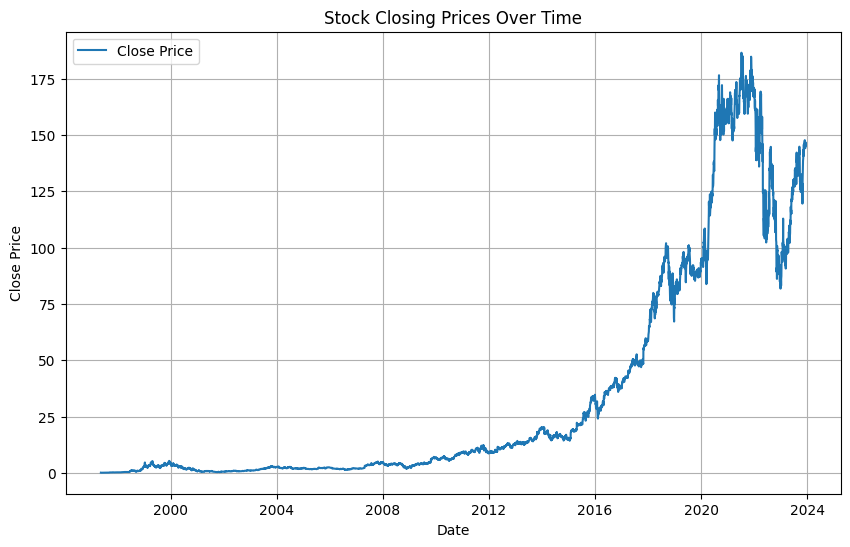

In [10]:
data=df.copy()
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(data['close'], label='Close Price')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

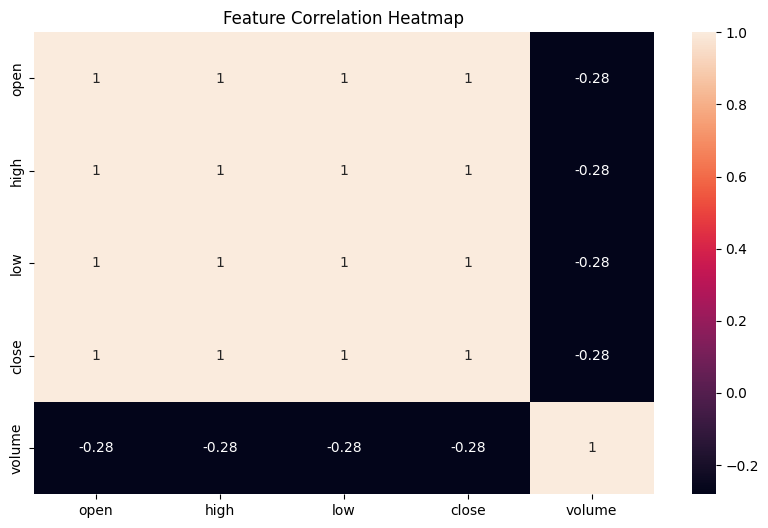

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True)  # data.corr() returns the correlation between each pair of variables
plt.title('Feature Correlation Heatmap')
plt.show()

# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [12]:
# Write your code here. Add as many boxes as you need.
data.sort_index(inplace=True)

**Handling Missing Dates**

In [13]:
data[:10]

,open,high,low,close,volume
date,,,,,
1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000
1997-05-22,0.0719,0.0724,0.0656,0.0698,235536000
1997-05-23,0.0703,0.0760,0.0667,0.0750,318744000
1997-05-27,0.0755,0.0823,0.0729,0.0792,173952000
1997-05-28,0.0812,0.0818,0.0766,0.0766,91488000


In [14]:
full_dates = pd.date_range(start=data.index.min(), end=data.index.max())
missing_dates = full_dates.difference(data.index)
print("Missing Dates:", missing_dates)

Missing Dates: DatetimeIndex(['1997-05-17', '1997-05-18', '1997-05-24', '1997-05-25',
               '1997-05-26', '1997-05-31', '1997-06-01', '1997-06-07',
               '1997-06-08', '1997-06-14',
               ...
               '2023-11-05', '2023-11-11', '2023-11-12', '2023-11-18',
               '2023-11-19', '2023-11-23', '2023-11-25', '2023-11-26',
               '2023-12-02', '2023-12-03'],
              dtype='datetime64[ns]', length=3017, freq=None)


In [15]:
# Ensure 'date' is the index
data = data.reindex(pd.date_range(start=data.index.min(), end=data.index.max()), fill_value=None)

# Fill missing values using interpolation
data.interpolate(method='linear', inplace=True)


In [16]:
data[:10]

,open,high,low,close,volume
1997-05-15,0.121900,0.125000,0.09640,0.097900,1.443120e+09
1997-05-16,0.098400,0.099000,0.08540,0.086500,2.940000e+08
1997-05-17,0.094933,0.095500,0.08400,0.086133,2.367120e+08
1997-05-18,0.091467,0.092000,0.08260,0.085767,1.794240e+08
1997-05-19,0.088000,0.088500,0.08120,0.085400,1.221360e+08
1997-05-20,0.086500,0.087500,0.08180,0.081800,1.093440e+08
1997-05-21,0.081800,0.082300,0.06880,0.071400,3.770640e+08
1997-05-22,0.071900,0.072400,0.06560,0.069800,2.355360e+08
1997-05-23,0.070300,0.076000,0.06670,0.075000,3.187440e+08
1997-05-24,0.071600,0.077575,0.06825,0.076050,2.825460e+08


**Lagging**

In [17]:
data['daily_range'] = data['high'] - data['low']
data['price_movement'] = data['close'] - data['open']

In [18]:
COLUMNS = ['close', 'volume', 'daily_range', 'price_movement']

for column in COLUMNS:
    for i in range(1, 8):
        data[f'{column}_shift_{i}'] = data[column].shift(i)

In [19]:
data.dropna(inplace=True)

In [20]:
data.head()

,open,high,low,close,volume,daily_range,price_movement,close_shift_1,close_shift_2,close_shift_3,...,daily_range_shift_5,daily_range_shift_6,daily_range_shift_7,price_movement_shift_1,price_movement_shift_2,price_movement_shift_3,price_movement_shift_4,price_movement_shift_5,price_movement_shift_6,price_movement_shift_7
1997-05-22,0.0719,0.072400,0.06560,0.06980,235536000.0,0.006800,-0.00210,0.07140,0.08180,0.0854,...,0.0115,0.0136,0.0286,-0.01040,-0.00470,-0.0026,-0.0057,-0.0088,-0.0119,-0.0240
1997-05-23,0.0703,0.076000,0.06670,0.07500,318744000.0,0.009300,0.00470,0.06980,0.07140,0.0818,...,0.0094,0.0115,0.0136,-0.00210,-0.01040,-0.0047,-0.0026,-0.0057,-0.0088,-0.0119
1997-05-24,0.0716,0.077575,0.06825,0.07605,282546000.0,0.009325,0.00445,0.07500,0.06980,0.0714,...,0.0073,0.0094,0.0115,0.00470,-0.00210,-0.0104,-0.0047,-0.0026,-0.0057,-0.0088
1997-05-25,0.0729,0.079150,0.06980,0.07710,246348000.0,0.009350,0.00420,0.07605,0.07500,0.0698,...,0.0057,0.0073,0.0094,0.00445,0.00470,-0.0021,-0.0104,-0.0047,-0.0026,-0.0057
1997-05-26,0.0742,0.080725,0.07135,0.07815,210150000.0,0.009375,0.00395,0.07710,0.07605,0.0750,...,0.0135,0.0057,0.0073,0.00420,0.00445,0.0047,-0.0021,-0.0104,-0.0047,-0.0026


**-> The unlagged versions (volume, daily_range, and price_movement) only
represent the current day and do not directly contribute to the forecasting task, which focuses on future values.**

In [21]:
data = data.drop(columns=['open', 'high', 'low', 'volume', 'daily_range', 'price_movement'])

In [22]:
data.head()

,close,close_shift_1,close_shift_2,close_shift_3,close_shift_4,close_shift_5,close_shift_6,close_shift_7,volume_shift_1,volume_shift_2,...,daily_range_shift_5,daily_range_shift_6,daily_range_shift_7,price_movement_shift_1,price_movement_shift_2,price_movement_shift_3,price_movement_shift_4,price_movement_shift_5,price_movement_shift_6,price_movement_shift_7
1997-05-22,0.06980,0.07140,0.08180,0.0854,0.085767,0.086133,0.086500,0.097900,377064000.0,109344000.0,...,0.0115,0.0136,0.0286,-0.01040,-0.00470,-0.0026,-0.0057,-0.0088,-0.0119,-0.0240
1997-05-23,0.07500,0.06980,0.07140,0.0818,0.085400,0.085767,0.086133,0.086500,235536000.0,377064000.0,...,0.0094,0.0115,0.0136,-0.00210,-0.01040,-0.0047,-0.0026,-0.0057,-0.0088,-0.0119
1997-05-24,0.07605,0.07500,0.06980,0.0714,0.081800,0.085400,0.085767,0.086133,318744000.0,235536000.0,...,0.0073,0.0094,0.0115,0.00470,-0.00210,-0.0104,-0.0047,-0.0026,-0.0057,-0.0088
1997-05-25,0.07710,0.07605,0.07500,0.0698,0.071400,0.081800,0.085400,0.085767,282546000.0,318744000.0,...,0.0057,0.0073,0.0094,0.00445,0.00470,-0.0021,-0.0104,-0.0047,-0.0026,-0.0057
1997-05-26,0.07815,0.07710,0.07605,0.0750,0.069800,0.071400,0.081800,0.085400,246348000.0,282546000.0,...,0.0135,0.0057,0.0073,0.00420,0.00445,0.0047,-0.0021,-0.0104,-0.0047,-0.0026


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [25]:
# Write your code here. Add as many boxes as you need.
X, y = data.drop(columns=["close"]).head(1000), data["close"].head(1000)

In [26]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [28]:
# Write your code here. Add as many boxes as you need.
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(train_X_scaled, train_y)

RandomForestRegressor(n_estimators=200, random_state=42)

Use the trained model to make predictions for the test set.

In [29]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(test_X_scaled)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [30]:
# Write your code here. Add as many boxes as you need.
mse = mean_squared_error(test_y, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(test_y, y_pred)
print("Mean Absolute Error:", mae)

rmse = mean_squared_error(test_y, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(test_y, y_pred)
print("R-Squared:", r2)

Mean Squared Error: 0.0472581388103538
Mean Absolute Error: 0.16184220458333393
Root Mean Squared Error: 0.2173893714291336
R-Squared: 0.8985458059184631


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
importance = pd.Series(model.feature_importances_, index=train_X.columns)
print(importance.sort_values(ascending=False))

close_shift_1             0.403316
close_shift_4             0.317381
close_shift_3             0.103315
close_shift_2             0.071606
close_shift_6             0.049670
close_shift_5             0.043016
close_shift_7             0.007265
price_movement_shift_1    0.000559
price_movement_shift_5    0.000360
price_movement_shift_7    0.000286
daily_range_shift_5       0.000265
daily_range_shift_2       0.000260
daily_range_shift_4       0.000241
volume_shift_7            0.000231
volume_shift_2            0.000230
volume_shift_1            0.000212
daily_range_shift_7       0.000188
price_movement_shift_2    0.000187
price_movement_shift_4    0.000179
price_movement_shift_3    0.000169
price_movement_shift_6    0.000166
volume_shift_5            0.000145
volume_shift_3            0.000139
daily_range_shift_6       0.000130
daily_range_shift_1       0.000127
daily_range_shift_3       0.000126
volume_shift_6            0.000118
volume_shift_4            0.000111
dtype: float64


In [32]:
important_features = [
    'close_shift_1', 'close_shift_2', 'close_shift_3', 'close_shift_4','close_shift_5','close_shift_6','close_shift_7'
]
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [33]:
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(train_X_scaled, train_y)

RandomForestRegressor(n_estimators=300, random_state=42)

In [34]:
y_pred = model.predict(test_X_scaled)

In [35]:
mse = mean_squared_error(test_y, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(test_y, y_pred)
print("Mean Absolute Error:", mae)

rmse = mean_squared_error(test_y, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(test_y, y_pred)
print("R-Squared:", r2)

Mean Squared Error: 0.04740770330079565
Mean Absolute Error: 0.16233184624999997
Root Mean Squared Error: 0.21773310106824742
R-Squared: 0.8982247195358215


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Boosting

In [36]:
X, y = data.drop(columns=["close"]).head(1000), data["close"].head(1000)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)

In [37]:
scaler2 = MinMaxScaler()

train_X_scaled = scaler2.fit_transform(train_X)
test_X_scaled = scaler2.transform(test_X)

Create an instance of an XGBoost model and train it using the `fit` function.

In [38]:
# Write your code here. Add as many boxes as you need.
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(train_X_scaled, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Use the trained model to make predictions for the test set.

In [39]:
# Write your code here. Add as many boxes as you need.
y_pred_2 = xgb.predict(test_X_scaled)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [40]:
# Write your code here. Add as many boxes as you need.
mse = mean_squared_error(test_y, y_pred_2)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(test_y, y_pred_2)
print("Mean Absolute Error:", mae)

rmse = mean_squared_error(test_y, y_pred_2, squared=False)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(test_y, y_pred_2)
print("R-Squared:", r2)

Mean Squared Error: 0.048616905868964916
Mean Absolute Error: 0.16699937601407375
Root Mean Squared Error: 0.22049241680603193
R-Squared: 0.8956287926727843


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
